## LAB 4

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
%matplotlib inline
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,12)

#### Introduction
In this lab we are going to work on how to estimate the background from 'real' data. Real is in air quotes because the data is actually from simplified simulations to make the problems manageable in a single lab. But the data will have some features that resemble that of real data sets.

Getting data and HD5
In general exchanging raw data is a pain. Writing data in text files is error prone, inaccurate, and wastes space, but raw binary files have all sorts of subtleties too (including the internal byte order of your processor). To try and sidestep a whole set of nasty issues, we are going to use HDF5 (originally developed by the National Center for Supercomputing Applications for data exchange) to allow everyone to import the data.

If you are working on your own machine, in either Matlab or python, follow the links in the assignment to download the files put them in your working directory.

Python

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd 
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (12,6)

In [3]:
hf = h5py.File('gammaray_lab4.h5/gammaray_lab4.h5', 'r')

In [4]:
hf.keys()

<KeysViewHDF5 ['data']>

In [5]:
data = np.array(hf.get('data'))

In [6]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [7]:
hf.close()

#### Problem 1

In this problem we are looking at the data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 milliseconds, and is in an approximately 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.

As with most data, there are 'features.' Your lab instructor has helpfully incorporated the meta-data into your data file.

1) Down load the data from the course website (gammaray_lab4.h5), and import it into your working environment. The data has 4 columns and more than 25 million rows. The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts. Make a few plots, generally exploring your data and making sure you understand it. Give a high level description of the data features you see. Specifically comment on whether you see signal contamination in your data, and how you plan to build a background pdf().

2) The background is not consistent across the dataset. Find and describe as accurately as you can how the background changes.

3) Create a model for the background that includes time dependence, and explicitly compare your model to the data. How good is your model of the background?

4) Because the background varies, your discovery sensitivity threshold (how many particles you would need to see) also varies. What is the '5-sigma' threshold for a 100 millisecond GRB at different times?

Optional: while this is simulated data, it is based on a real effect seen by low Earth orbit satellites. Can you identify the cause of the variable background and propose a physical model?

<b> 1) </b> Exploratory Data Analysis 

In [8]:
data=data.transpose()
df=pd.DataFrame(data,columns=["Time (gps)","Solar phase (deg)","Longitude(deg)","Particle Counts"])
df.head(2)

,Time (gps),Solar phase (deg),Longitude(deg),Particle Counts
0,940680016.0,315.000000,45.000000,10.0
1,940680016.1,315.007112,45.006667,8.0


<b> A. Particle Counts (without rolling mean) </b> 

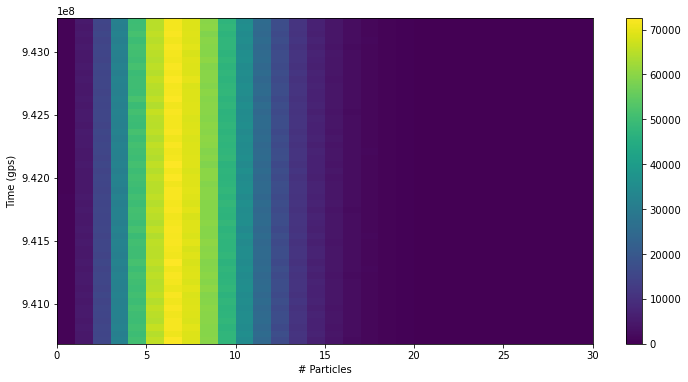

In [9]:
plt.hist2d(df["Particle Counts"],df["Time (gps)"],bins=[30,50])
plt.colorbar()
plt.xlabel("# Particles")
plt.ylabel("Time (gps)")
plt.show()

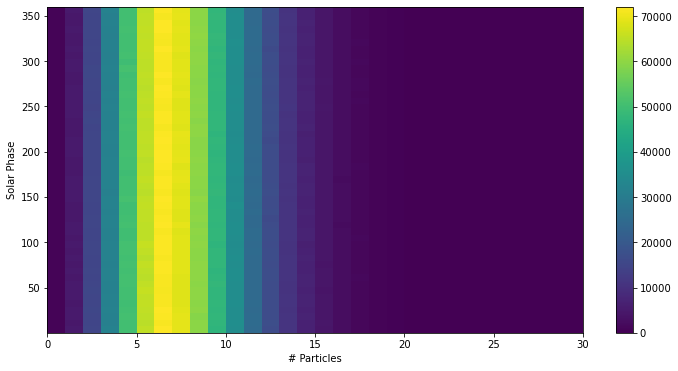

In [10]:
plt.hist2d(df["Particle Counts"],df["Solar phase (deg)"],bins=[30,50]) 
plt.colorbar()
plt.xlabel("# Particles")
plt.ylabel("Solar Phase")
plt.show()

Text(0, 0.5, 'Count')

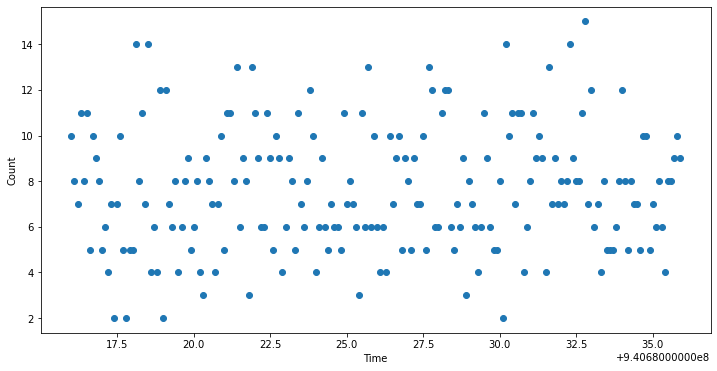

In [11]:
plt.scatter(df["Time (gps)"][:200],df["Particle Counts"][:200])
plt.xlabel("Time")
plt.ylabel("Count")

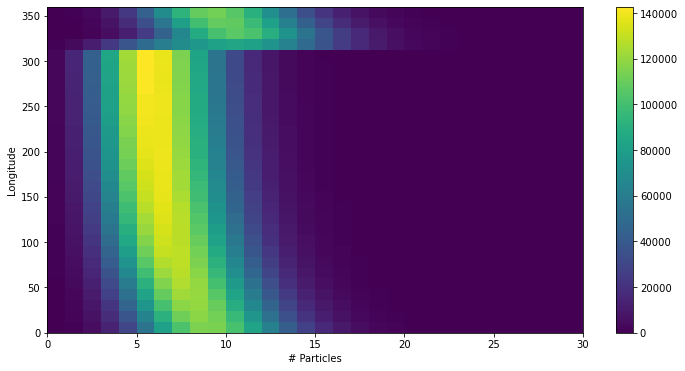

In [12]:
a=plt.hist2d(df["Particle Counts"],df["Longitude(deg)"],bins=30)
plt.colorbar()
plt.xlabel("# Particles")
plt.ylabel("Longitude")
plt.show()

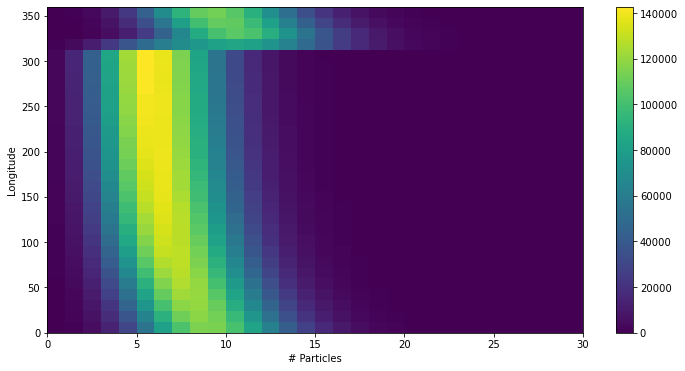

In [13]:
a=plt.hist2d(df["Particle Counts"],df["Longitude(deg)"],bins=30)
plt.colorbar()
plt.xlabel("# Particles")
plt.ylabel("Longitude")
plt.show()

In [18]:
df["Time (gps)"]=(df["Time (gps)"])%5400

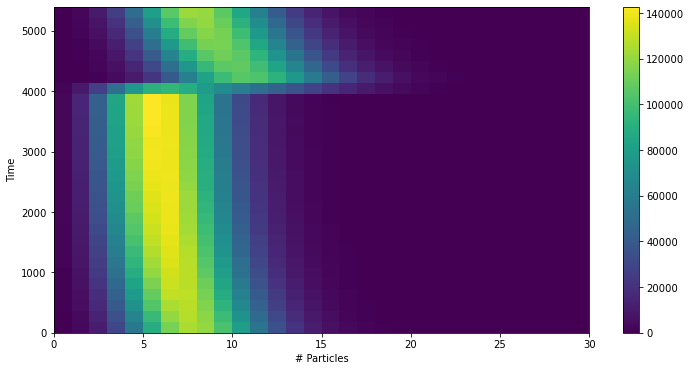

In [19]:
a=plt.hist2d(df["Particle Counts"],df["Time (gps)"],bins=30)
plt.colorbar()
plt.xlabel("# Particles")
plt.ylabel("Time")
plt.show()

<b> Rolling Mean Plots

In [8]:
df=pd.DataFrame(data,columns=["Time (gps)","Solar phase (deg)","Longitude(deg)","Particle Counts"])
df["Time (gps)"]=(df["Time (gps)"])%5400

In [23]:
window=2

In [24]:
rolling_windows=df.rolling(window)
Count_mean_1=rolling_windows.mean()

In [25]:
Count_mean_1=Count_mean_1[window:]

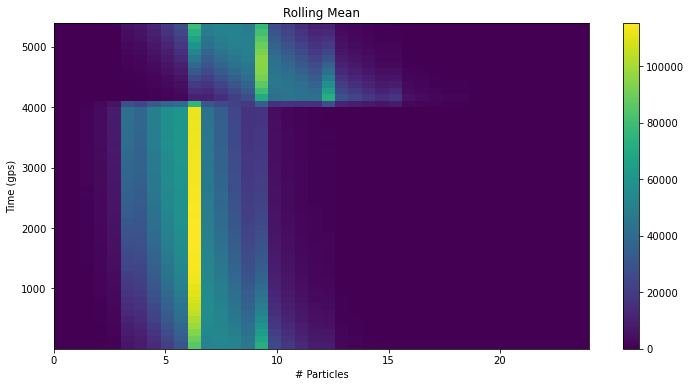

In [26]:
plt.hist2d(Count_mean_1["Particle Counts"],Count_mean_1["Time (gps)"],bins=[40,50])
plt.colorbar()
plt.xlabel("# Particles")
plt.ylabel("Time (gps)")
plt.title("Rolling Mean")
plt.show()

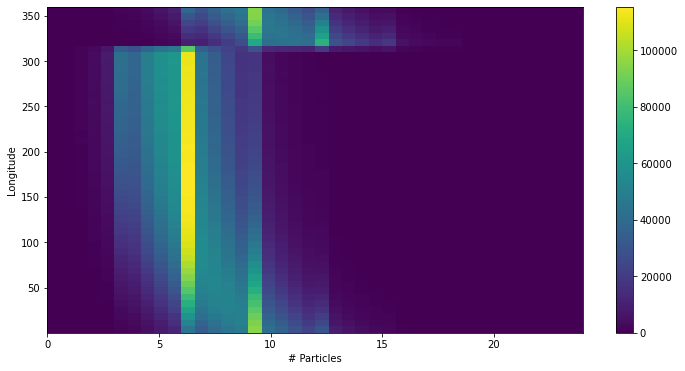

In [20]:
a=plt.hist2d(Count_mean_1["Particle Counts"],Count_mean_1["Longitude(deg)"],bins=[40,50])
plt.colorbar()
plt.xlabel("# Particles")
plt.ylabel("Longitude")
plt.show()

<b> Description of Observation: </b> <br> 


<u> # Particles vs Longitude </u> : Peak shifts outside bounds y~[150,310].The average shifts to the right in either case. But the shift is sudden at ~ 310 degrees. This indicates <b> contamination </b>. This was reproduced in the Time vs Counts graph when time was folded and corresponds to 1/4th of the orbital time.


<u> # Particles vs Time </u> : Periodic fluctuations are observed in time but the pattern itself is consistent with a peak at ~7 particles. This indicates no contamination in time.


<u> # Particles vs Solar Phase </u> : Periodic fluctuations are observed in time but the pattern itself is consistent with a peak at ~7 particles throughout the data. This indicates no contamination due to solar phase.

<b> A. Rolling Mean </b><br> 
Rolling Mean is the average for a window of data. I can highlight the contamination using this representation.

In [29]:
w=30

In [22]:
#test_data=df.query(f'300 < `Longitude(deg)` < 360')

In [30]:
rolling_windows=df.rolling(w)
Count_mean=rolling_windows.mean()

In [31]:
Count_mean=Count_mean[w:]

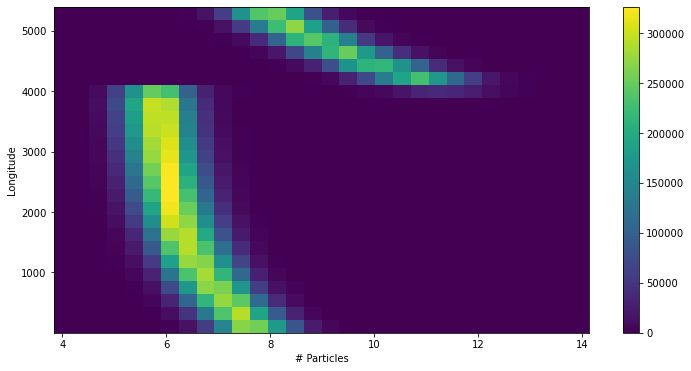

In [32]:
plt.hist2d(Count_mean["Particle Counts"],Count_mean["Time (gps)"],bins=[30,25])
plt.colorbar()
plt.xlabel("# Particles")
plt.ylabel("Longitude")
plt.show()

<b> Background PDF </b> I plan to build different Poissons for different intervals of time. 

<b> 2 </b>

As seen in the figures above, though the peak is consistently at 7 particles, the brightness varies for Folded Time vs Count and Longitude vs Counts Plots. 
Peak shifts at ~310 deg and ~150 deg.The average shifts to the right in either case. But the shift is sudden at ~ 310 degrees. This indicates contamination due to longitude 310 degrees.I ensured that this was not due to the effects of bins by keeping the number of bins less than the number of data points, but still sufficiently large to not get caught-up in jitters. 
Just by looking at the graphs, below 150 deg, average appears about 8 particles while above 310 deg it seems 10 particles is the mean.

These bounds are time equivalents of: 

Region 1: [0 - 1800 ) seconds <br>
Region 2 : [1800 - 4000) <br>
Region 3: [4000 - 5400] <br>


<b> 3 </b>

<b> Plotting background </b>

The times in this section is the folded time (folded per orbit)

In [29]:
import scipy.stats as stats
from scipy.stats import poisson

In [12]:
df["Time (gps)"]=df["Time (gps)"]%5400

In [ ]:
rolling_windows=df.rolling(2)
Count_mean=rolling_windows.mean()
Count_mean

In [12]:
region_3=df.query(f'4000 <= `Time (gps)` < 5400')

In [12]:
#rolling_region_3=Count_mean_1.query(f'310 < `Longitude(deg)` < 360')

In [13]:
max(region_3["Particle Counts"])

30.0

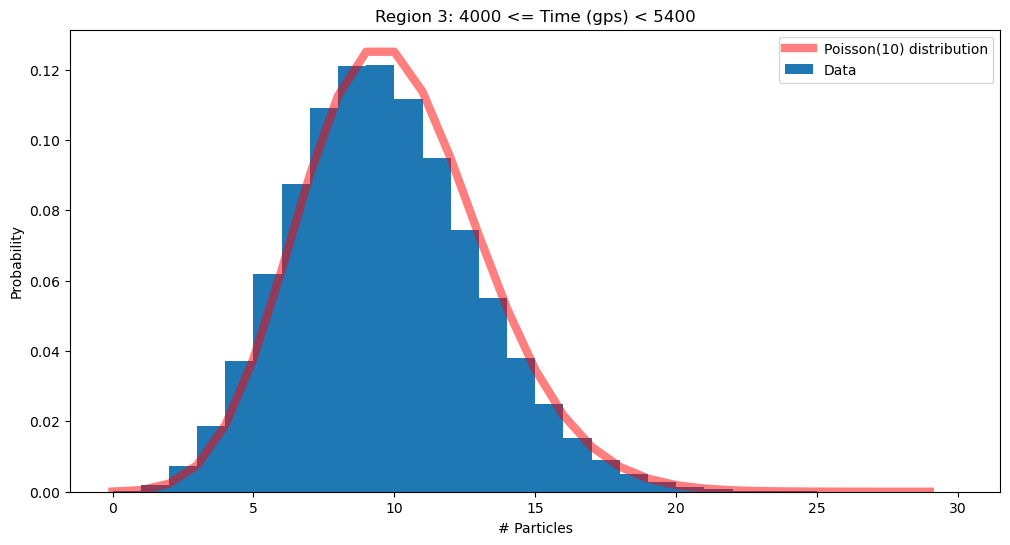

In [19]:
h=plt.hist(region_3["Particle Counts"],bins=30,density=True,label="Data")
x = np.arange(0,30,1)
y = poisson.pmf(x, mu=10)
plt.plot(x, y,c="r",lw=6,alpha=0.5,label="Poisson(10) distribution")
plt.legend()
plt.xlabel("# Particles")
plt.ylabel("Probability")
plt.title("Region 3: 4000 <= Time (gps) < 5400")
plt.show()

In [21]:
region_2=df.query(f'1800 <= `Time (gps)` < 4000')
#rolling_region_2=Count_mean.query(f'200 < `Longitude(deg)` < 310')

In [22]:
max(region_2["Particle Counts"])

24.0

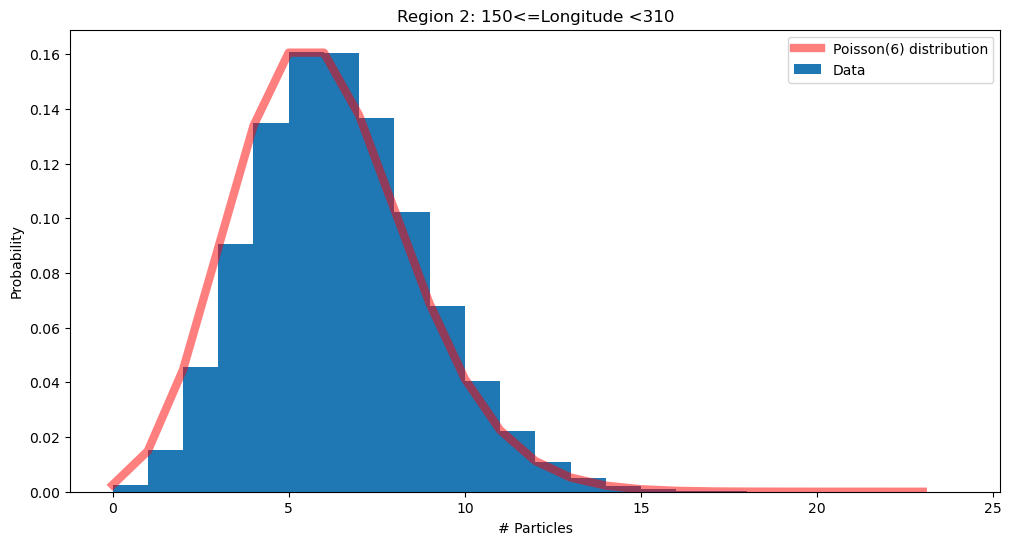

In [23]:
h=plt.hist(region_2["Particle Counts"],bins=24,density=True,label="Data")
x = np.arange(0,24,1)
y = poisson.pmf(x, mu=6)
plt.plot(x, y,c="r",lw=6,alpha=0.5,label="Poisson(6) distribution")
plt.legend()
plt.xlabel("# Particles")
plt.ylabel("Probability")
plt.title("Region 2: 150<=Longitude <310")
plt.show()

In [25]:
region_1=df.query(f'0 <= `Time (gps)` < 1800')

In [26]:
max(region_1["Particle Counts"])

26.0

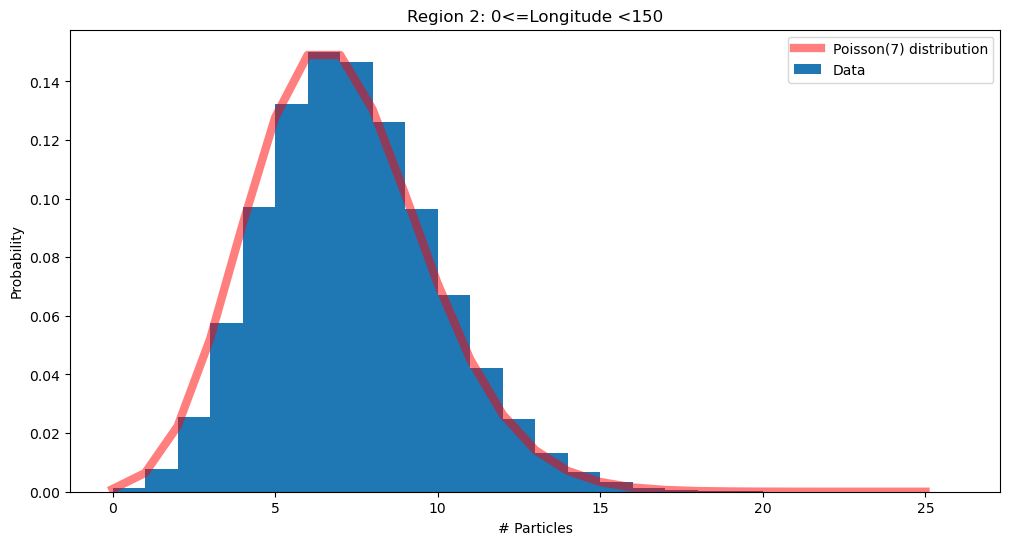

In [28]:
h=plt.hist(region_1["Particle Counts"],bins=26,density=True,label="Data")
x = np.arange(0,26,1)
y = poisson.pmf(x, mu=7)
plt.plot(x, y,c="r",lw=6,alpha=0.5,label="Poisson(7) distribution")
plt.legend()
plt.xlabel("# Particles")
plt.ylabel("Probability")
plt.title("Region 2: 0<=Longitude <150")
plt.show()

<b> Comparison to original background </b>

In [33]:
max(df["Particle Counts"])

30.0

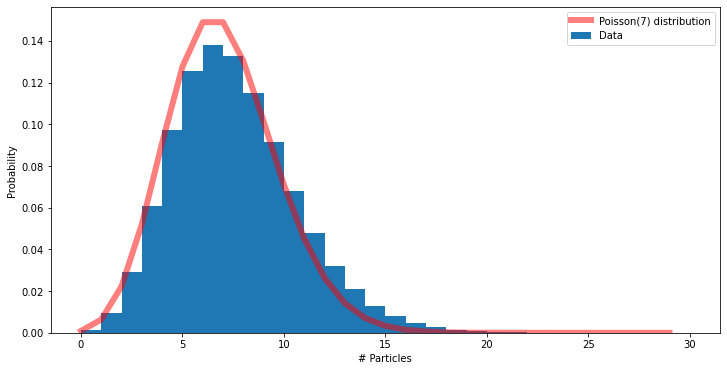

In [32]:
h=plt.hist(df["Particle Counts"],bins=30,density=True,label="Data")
x = np.arange(0,30,1)
y = poisson.pmf(x, mu=7)
plt.plot(x, y,c="r",lw=6,alpha=0.5,label="Poisson(7) distribution")
plt.legend()
plt.xlabel("# Particles")
plt.ylabel("Probability")
# showing the graph
plt.show()

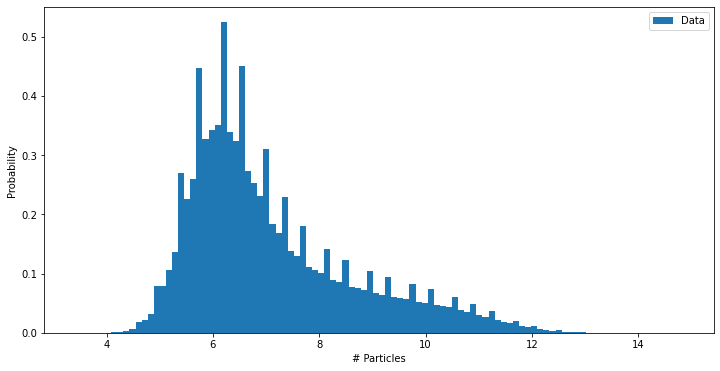

In [70]:
h=plt.hist(Count_mean["Particle Counts"],bins=100,density=True,label="Data")
#x = np.arange(0,30,1)
y = poisson.pmf(x, mu=10)
#plt.plot(x, y,c="r",lw=6,alpha=0.5,label="Poisson(7) distribution")
plt.legend()
plt.xlabel("# Particles")
plt.ylabel("Probability")
# showing the graph
plt.show()

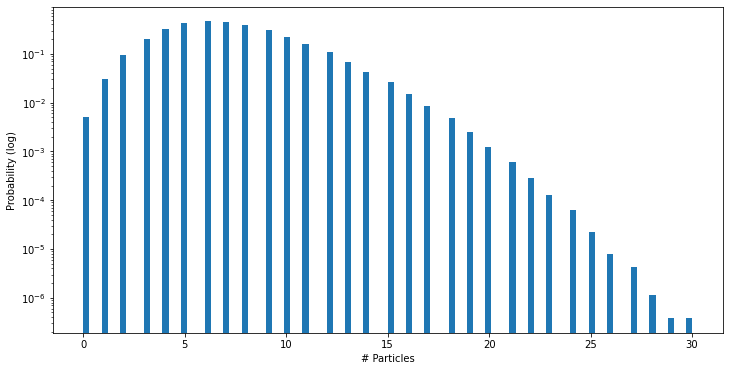

In [36]:
h=plt.hist(df["Particle Counts"],bins=100,density=True)
plt.yscale("log")
plt.xlabel("# Particles")
plt.ylabel("Probability (log)")
plt.show()

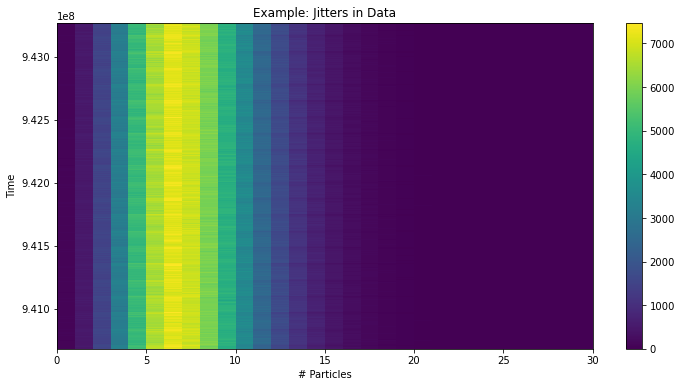

In [9]:
a=plt.hist2d(df["Particle Counts"],df["Time (gps)"],bins=[30,500])
plt.colorbar()
plt.xlabel("# Particles")
plt.ylabel("Time")
plt.title("Example: Jitters in Data")
plt.show()

An example of jitters or fluctuations when bin size is high. We would like to minimize the effect of such fluctuations by using rolling mean method so that the pattern can be spotted easily. 

Checking if behaviour is due to bin size or the actual data. 

In [22]:
len(np.unique(df["Solar phase (deg)"]))

25920001

This observation cannot be because of the bin size as in both graphs, the bins corresponding to the y axis are less than the number of data points along y axis. 

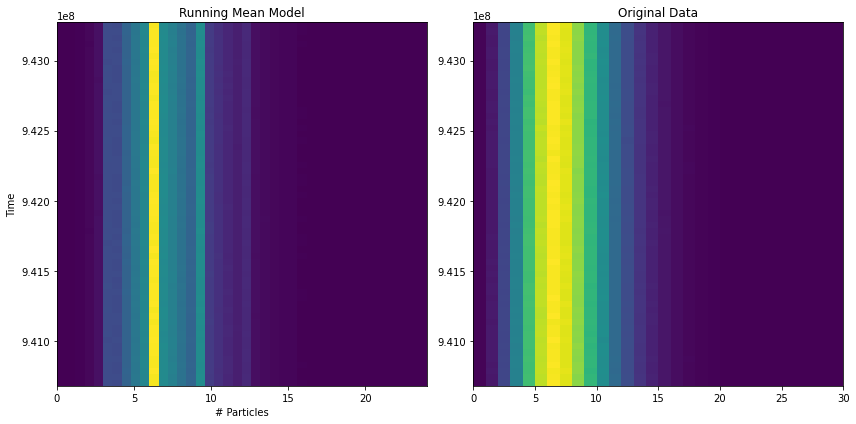

In [23]:
fig,(ax2,ax3)=plt.subplots(1,2)


ax2.hist2d(Count_mean,df["Time (gps)"][1:],bins=[40,60])
ax2.set_title("Running Mean Model")

ax3.hist2d(df["Particle Counts"],df["Time (gps)"],bins=[30,60])
ax3.set_title("Original Data")


ax2.set_ylabel("Time")
ax2.set_xlabel("# Particles")
plt.tight_layout()
plt.show()

Running Mean Model gives a peak at 7 particles and has a much lower variance in x than the original data when #bins =40 (since it is a mean, it can have non-integer particle counts, hence the higher bin size). Fluctuations in y also seem to have reduced.

<b> Accuracy of Model </b>

The time-split model I have does not perfectly describe the distribution as seen from the histograms. It could be because of the fluctuation I talkef about earlier but my model sometimes overestimates and sometimes underestimates probabilities. 

4) What is the '5-sigma' threshold for a 100 millisecond GRB at different times? <br> <br>

<b> Statistical Question: </b> At what # particles is the probability of detection due to background 5 sigma or lower?

In [20]:
sigma_to_prob=stats.norm.cdf(5)
sigma_to_prob

0.9999997133484281

In [21]:
prob_to_sigma_R1=poisson.ppf(sigma_to_prob,7)
prob_to_sigma_R2=poisson.ppf(sigma_to_prob,6)
prob_to_sigma_R3=poisson.ppf(sigma_to_prob,10)

In [25]:
print ("Region 1: ",prob_to_sigma_R1,";\tRegion 2: ",prob_to_sigma_R2,";\tRegion 3: ",prob_to_sigma_R3)

Region 1:  24.0 ;	Region 2:  22.0 ;	Region 3:  29.0


#### Problem 2
In this problem we are going to look at a stack of telescope images (again simulated). We have 10 images, but you and your lab partner will be looking for different signals. One of you will be looking for the faintest stars, while the other will be looking for a transient (something like a super novae that only appears in one image). Flip a coin to determine which of you is pursuing which question.

1) Dowload the data from images.h5. This is a stack of 10 square images, each 200 pixels on a side.

2) Explore the data. Is there signal contamination? Is the background time dependent? Is it consistent spatially? Develop a plan to calculate your background pdf().

3) Using your background distribution, hunt for your signal (either faint stars, or a transient). Describe what you find.

4) You and your lab partner had different pdf(), but were using the same data. Explore why this is.

<b> 1. </b>

In [13]:
hf = h5py.File('images.h5', 'r')
hf.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

In [ ]:
image1 = np.array(hf.get('image1'))
other9 = np.array(hf.get('imagestack'))
image2 = other9[:,:,0]
image3 = other9[:,:,1]
image4 = other9[:,:,2]
image5 = other9[:,:,3]
image6 = other9[:,:,4]
image7 = other9[:,:,5]
image8 = other9[:,:,6]
image9 = other9[:,:,7]
image10 = other9[:,:,8]
image11 = other9[:,:,9]

<b> 2 </b> 

<u> Exploring Contamination </u> <br> If there is contamination, then different slices of the same stack will have noticeably different data profiles. I only explored this along one dimension because it was sufficient for this question. 

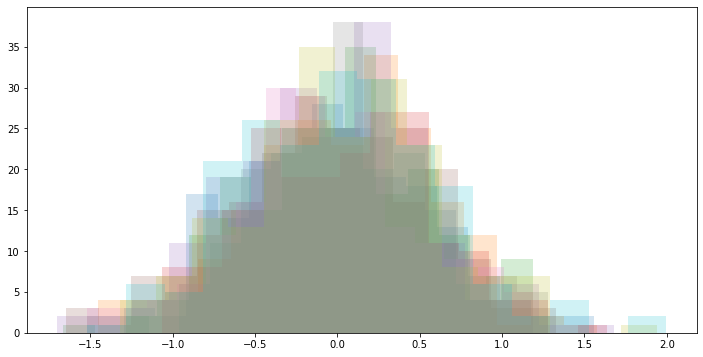

In [56]:
fig,ax=plt.subplots()
ax.hist(image2[0],alpha=0.2,bins=15)
ax.hist(image3[0],alpha=0.2,bins=15)
ax.hist(image4[0],alpha=0.2,bins=15)
ax.hist(image5[0],alpha=0.2,bins=15)
ax.hist(image6[0],alpha=0.2,bins=15)
ax.hist(image7[0],alpha=0.2,bins=15)
ax.hist(image8[0],alpha=0.2,bins=15)
ax.hist(image9[0],alpha=0.2,bins=15)
ax.hist(image10[0],alpha=0.2,bins=15)
ax.hist(image11[0],alpha=0.2,bins=15)
plt.show()

<u> Exploring Spatial Dependence: </u> Can be determined by plotting the variation along pixels. Showing this for one slice was sufficiet for the purposes of this question. 

Text(0.5, 1.0, 'Image 1')

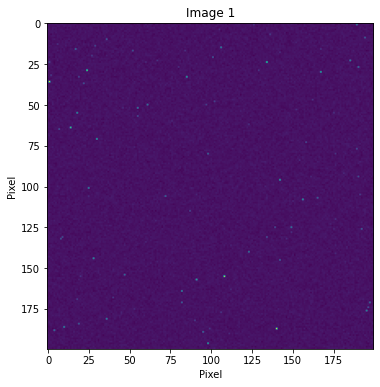

In [15]:
plt.imshow(image1)
plt.xlabel("Pixel")
plt.ylabel("Pixel")
plt.title("Image 1")

In [23]:
image1.shape

(200, 200)

Text(0.5, 1.0, 'Vertical')

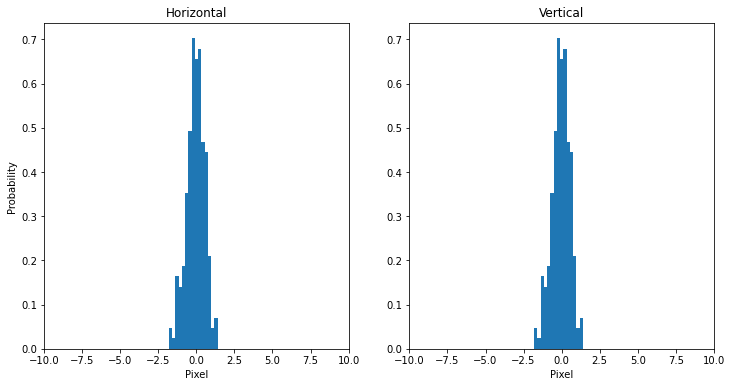

In [33]:
fig,(ax,ax1)=plt.subplots(1,2)
s=ax.hist(image1[0],density=True,bins=15)
ax.set_xlim(-10,10)
s=ax1.hist(image1[0],density=True,bins=15)
ax1.set_xlim(-10,10)
ax.set_xlabel("Pixel")
ax1.set_xlabel("Pixel")
ax.set_ylabel("Probability")
ax.set_title("Horizontal")
ax1.set_title("Vertical")

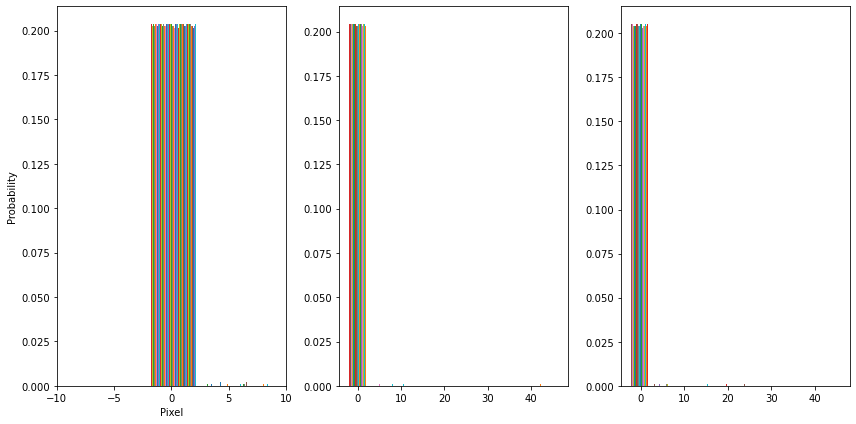

In [110]:
fig,(ax,ax2,ax3)=plt.subplots(1,3)
s=ax.hist(image1,density=True) 
ax2.hist(image3,density=True)
ax3.hist(image5,density=True)
ax.set_xlim(-10,10)
ax.set_xlabel("Pixel")
ax.set_ylabel("Probability")
plt.tight_layout()

<u> Exploring Time Dependence: </u> : Each slice represents a different time. Thus, I plot histograms for each slice to determine time dependence. 

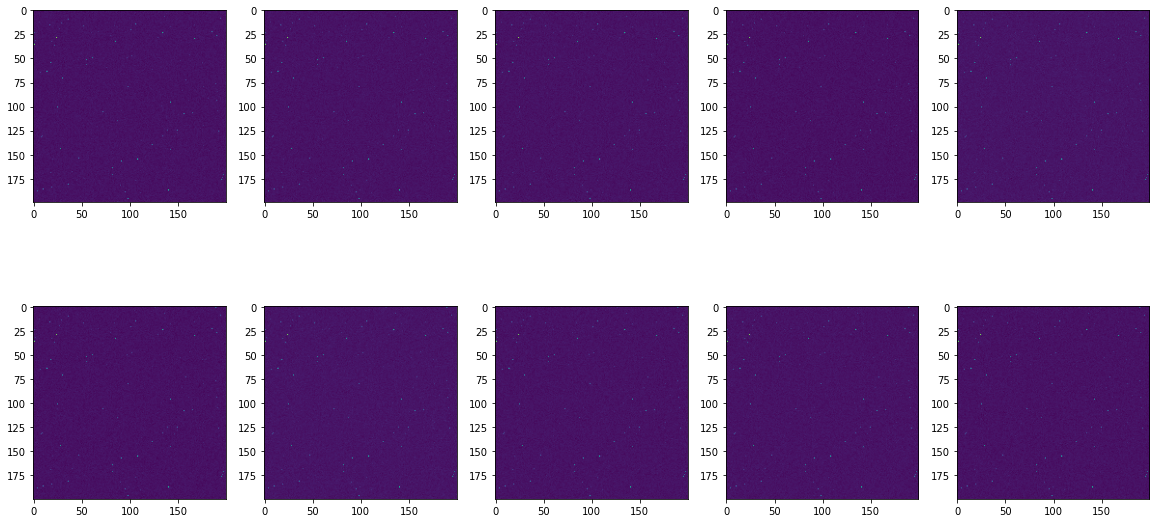

In [65]:
fig, ([ax00, ax01, ax02, ax03, ax04], [ax10, ax11, ax12, ax13, ax14])  = plt.subplots(2,5, figsize = (20,10))
ax00.imshow(image2)
ax01.imshow(image11)
ax02.imshow(image3)
ax03.imshow(image4)
ax04.imshow(image5)
ax10.imshow(image6)
ax11.imshow(image7)
ax12.imshow(image8)
ax13.imshow(image9)
ax14.imshow(image10)

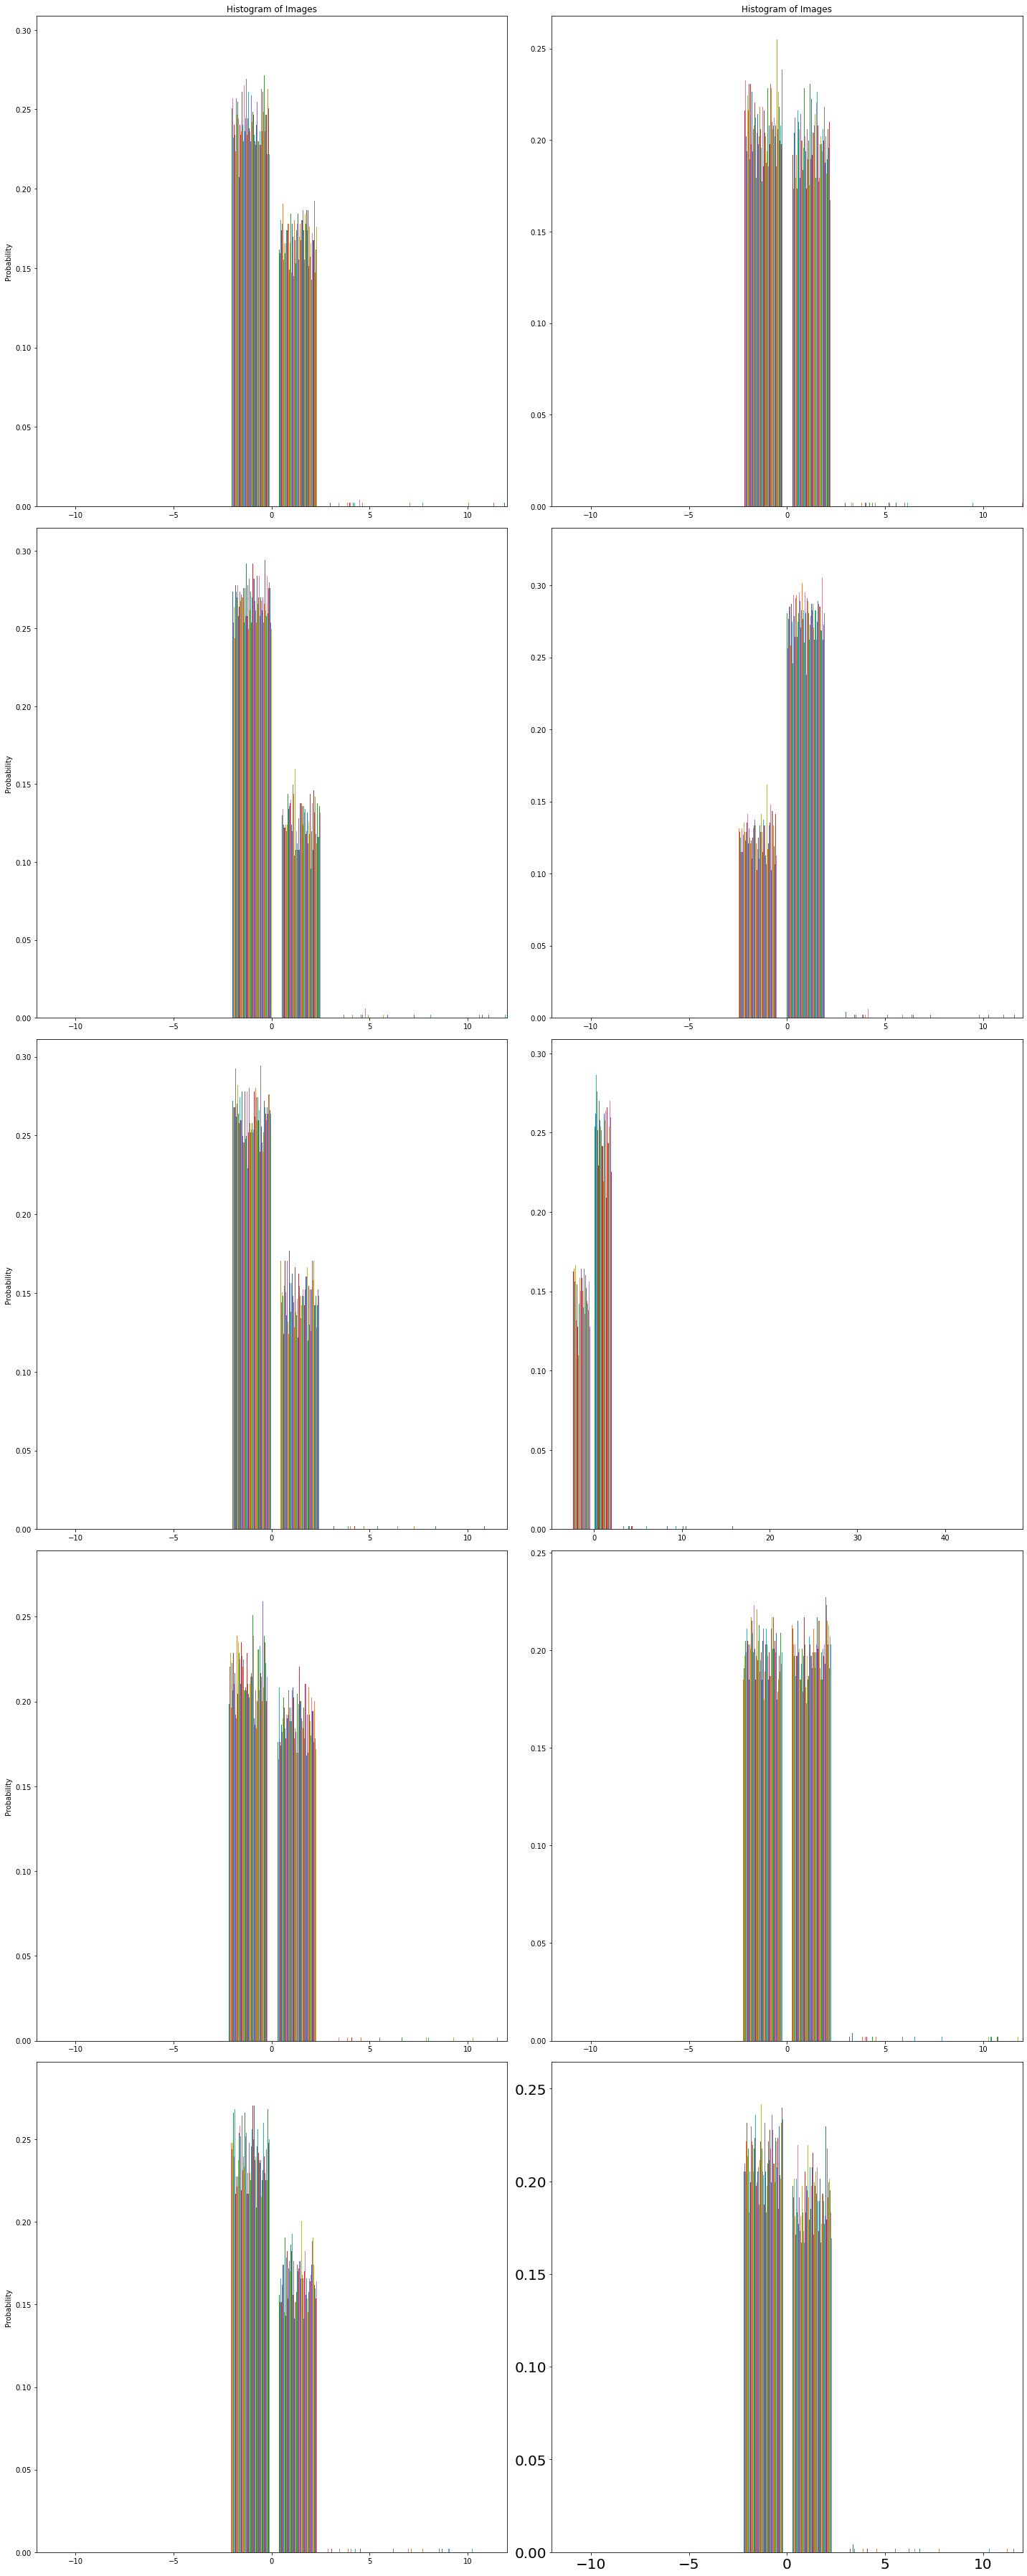

In [74]:
fig, ([ax00, ax01], [ax02, ax03], [ax04, ax10], [ax11, ax12], [ax13, ax14])  = plt.subplots(5,2, figsize = (20,50))
ful=[image2,image3,image4,image5,image6,image7,image8,image9,image10,image11]
ax00.hist(ful[0],density=True,bins=20)
ax00.set_ylabel("Probability")
ax01.hist(ful[1],density=True,bins=20)
ax02.hist(ful[2],density=True,bins=20)
ax02.set_ylabel("Probability")
ax03.hist(ful[3],density=True,bins=20)
ax04.hist(ful[4],density=True,bins=20)
ax04.set_ylabel("Probability")
ax10.hist(ful[5],density=True,bins=20)
ax11.hist(ful[6],density=True,bins=20)
ax11.set_ylabel("Probability")
ax12.hist(ful[7],density=True,bins=20)
ax13.hist(ful[8],density=True,bins=20)
ax13.set_ylabel("Probability")
ax14.hist(ful[9],density=True,bins=20)

ax00.set_title("Histogram of Images")
ax01.set_title("Histogram of Images")
ax00.set_xlim([-12,12])
ax01.set_xlim([-12,12])
ax02.set_xlim([-12,12])
ax03.set_xlim([-12,12])
ax04.set_xlim([-12,12])
ax11.set_xlim([-12,12])
ax12.set_xlim([-12,12])
ax13.set_xlim([-12,12])
ax14.set_xlim([-12,12])

plt.tick_params(labelsize = 20)
plt.tight_layout()
plt.show()

There appears to be signal contamination as seen by inconsistent plots. It is also not consistent spatially since different images have different plots. 

<u> Plan </u> <br>
Plots indicate spatial dependence. There appears to be contamination but it could just be an effect of time dependence. But time difference can be ignored in this case. A better model would be given by difference of one image with the average of all others. I plan to use this to create a background pdf. 

<b> 3. </b> 

I am looking for transient stars. This means, I need to use a trials factor of 10 so that I don't miss any outliers. I can find the difference of all images and hunt for signal in the result. This will not affect the signal as it is in only one image. 

In [130]:
bkgd=image2-((image3+image4+image5+image6+image7+image8+image9+image10+image11))/9

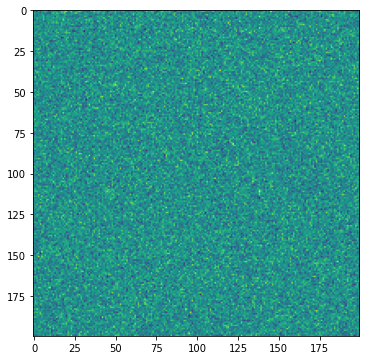

In [131]:
plt.imshow(bkgd)

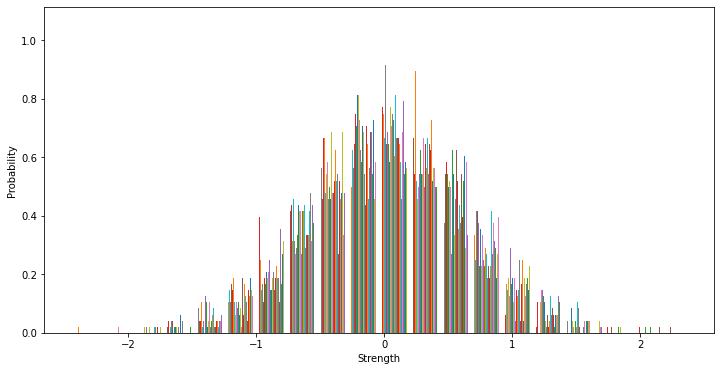

In [137]:
plt.hist(bkgd,density=True,bins=20)
plt.xlabel("Strength")
plt.ylabel("Probability")
plt.show()

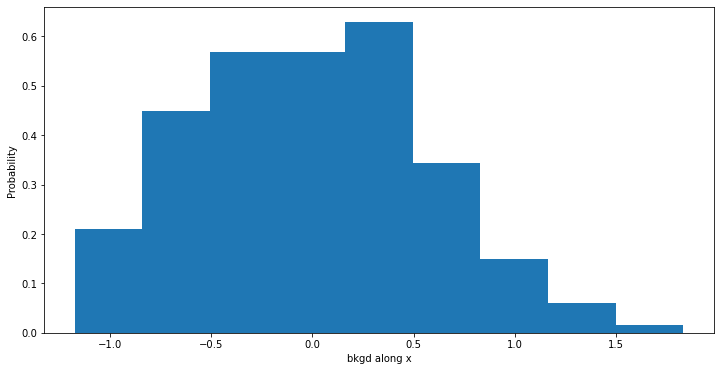

In [147]:
plt.hist(bkgd[0],density=True,bins=9)
plt.xlabel("bkgd along x")
plt.ylabel("Probability")
plt.show()

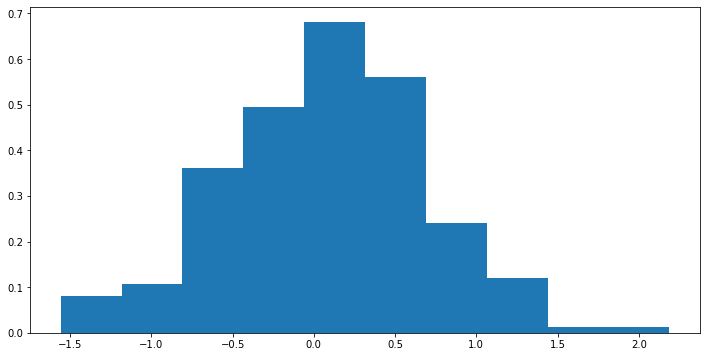

In [146]:
plt.hist(bkgd[1],density=True)
plt.show()

In [158]:
signal_strength=0.2
c=[]
for i in bkgd[0]:
    if i>= signal_strength:
        c.append(abs(i))
prob=len(c)/len(bkgd[0])
prob

0.365

In [160]:
cc=[]
for i in bkgd[1]:
    if i>= signal_strength:
        cc.append(abs(i))
proby=len(cc)/len(bkgd[1])
proby

0.43

In [162]:
prob_to_sigma=stats.norm.ppf(prob)
prob_to_sigma

0.1763741647808615

In [123]:
diff=np.array([image3-image2,image4-image3,
               image5-image4,image6-image5,
               image7-image6,image8-image7,
               image9-image8,image10-image9,image11-image10])

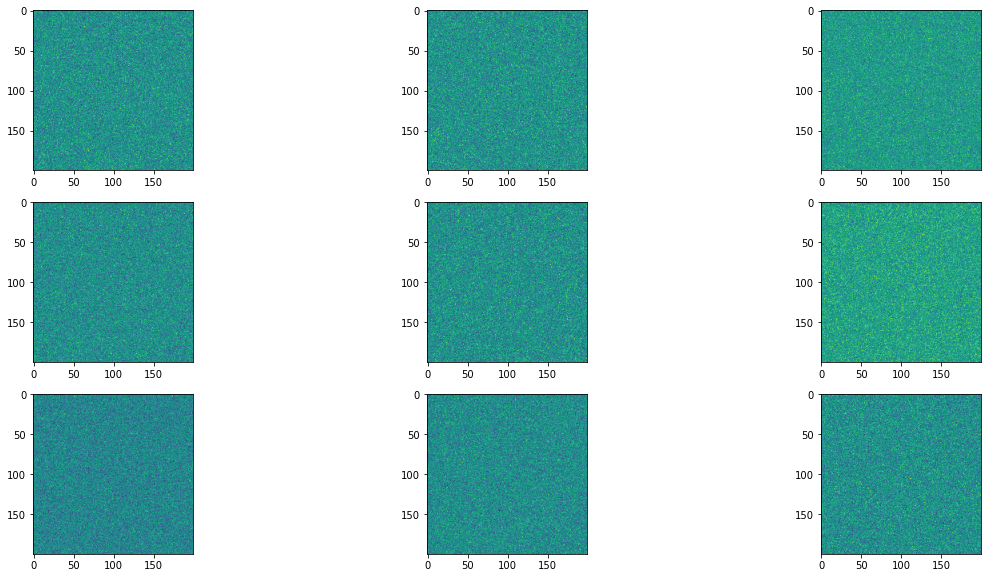

In [98]:
fig, ([ax00, ax01, ax02], [ax03, ax04,ax10], [ax11, ax12, ax13])  = plt.subplots(3,3, figsize = (20,10))
ax00.imshow(diff[0])
ax01.imshow(diff[1])
ax02.imshow(diff[2])
ax03.imshow(diff[3])
ax04.imshow(diff[4])
ax10.imshow(diff[5])
ax11.imshow(diff[6])
ax12.imshow(diff[7])
ax13.imshow(diff[8])

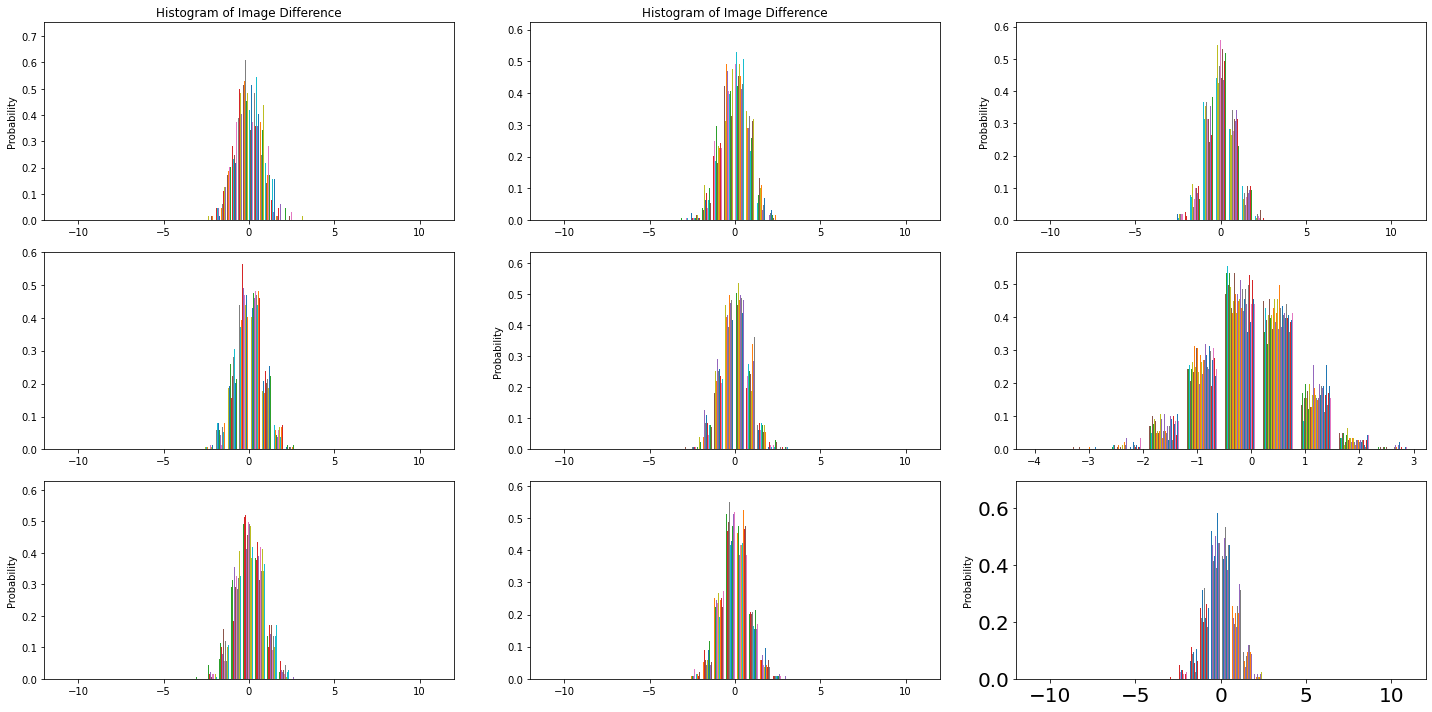

In [99]:
fig, ([ax00, ax01, ax02], [ax03, ax04,ax10], [ax11, ax12, ax13])  = plt.subplots(3,3, figsize = (20,10))
ax00.hist(diff[0],density=True,bins=20)
ax00.set_ylabel("Probability")
ax01.hist(diff[1],density=True)
ax02.hist(diff[2],density=True)
ax02.set_ylabel("Probability")
ax03.hist(diff[3],density=True)
ax04.hist(diff[4],density=True)
ax04.set_ylabel("Probability")
ax10.hist(diff[5],density=True)
ax11.hist(diff[6],density=True)
ax11.set_ylabel("Probability")
ax12.hist(diff[7],density=True)
ax13.hist(diff[8],density=True)
ax13.set_ylabel("Probability")

ax00.set_title("Histogram of Image Difference")
ax01.set_title("Histogram of Image Difference")
ax00.set_xlim([-12,12])
ax01.set_xlim([-12,12])
ax02.set_xlim([-12,12])
ax03.set_xlim([-12,12])
ax04.set_xlim([-12,12])
ax11.set_xlim([-12,12])
ax12.set_xlim([-12,12])
ax13.set_xlim([-12,12])

plt.tick_params(labelsize = 20)
plt.tight_layout()
plt.show()

<b> 4. </b> 

My lab partner and I had the same data but had different statistical questions. Because of this, our exploration varied. I specifically looked for outliers using the trials method while my partner performed averaging. 

In [ ]:

start = 80000 
n = 100000
subset = df[["Time (gps)","Longitude(deg)","Particle Counts"]][start:start + n]
fig, ax1 = plt.subplots(figsize = (15, 4))

ax1.scatter(subset['Time (gps)'], subset['Longitude(deg)'])
ax1.set_ylabel('Longitude(deg)')
ax1.set_xlabel('Time')
every1000 = table[table.index % 1000 == 0]  # Selects every 1000th row starting from 0
periodic_data = every1000
periodic_data['Time'] = ((every1000['Time']) % 5400)
every1000 = table[table.index % 1000 == 0]  # Selects every 1000th row starting from 0
periodic_shift = every1000
periodic_shift['Time'] = ((every1000['Time']-4040) % 5400)
fig,(ax,ax1,ax2)=plt.subplots(1,3)
x = subset["Time (gps)"][:1000]
y = subset["Longitude(deg)"][:1000]
ax.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x + b)

x = subset["Time (gps)"][2100:5000]
y = subset["Longitude(deg)"][2100:5000]
ax1.plot(x, y, 'o')
m1, b1 = np.polyfit(x, y, 1)
ax1.plot(x, m1*x + b1)

x = subset["Time (gps)"][-1000:]
y = subset["Longitude(deg)"][-1000:]
ax2.plot(x, y, 'o')
m2, b2 = np.polyfit(x, y, 1)
ax2.plot(x, m2*x + b2)
print (m,b,"\n",m1,b1,"\n",m2,b2)